In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, make_scorer




from imblearn.over_sampling import SMOTE


pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [2]:
data = pd.read_csv("/Users/fangyiru/Downloads/lending_club_loan_two.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

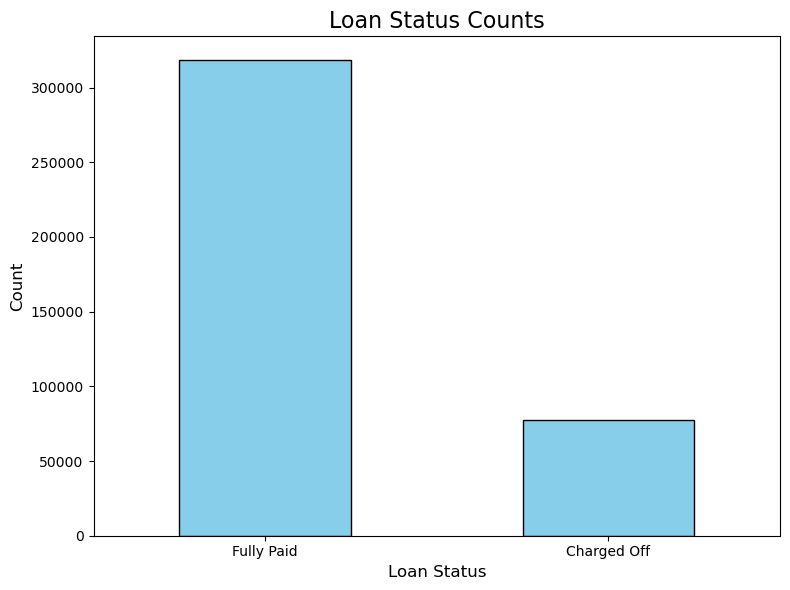

In [4]:
## we only pay attentionn to the fully_paid and charged off.
loan_status_counts = data['loan_status'].value_counts()
# Create the bar plot
plt.figure(figsize=(8, 6))
loan_status_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Loan Status Counts', fontsize=16)
plt.xlabel('Loan Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
# Show the plot
plt.show()


In [5]:
loan_status_counts

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

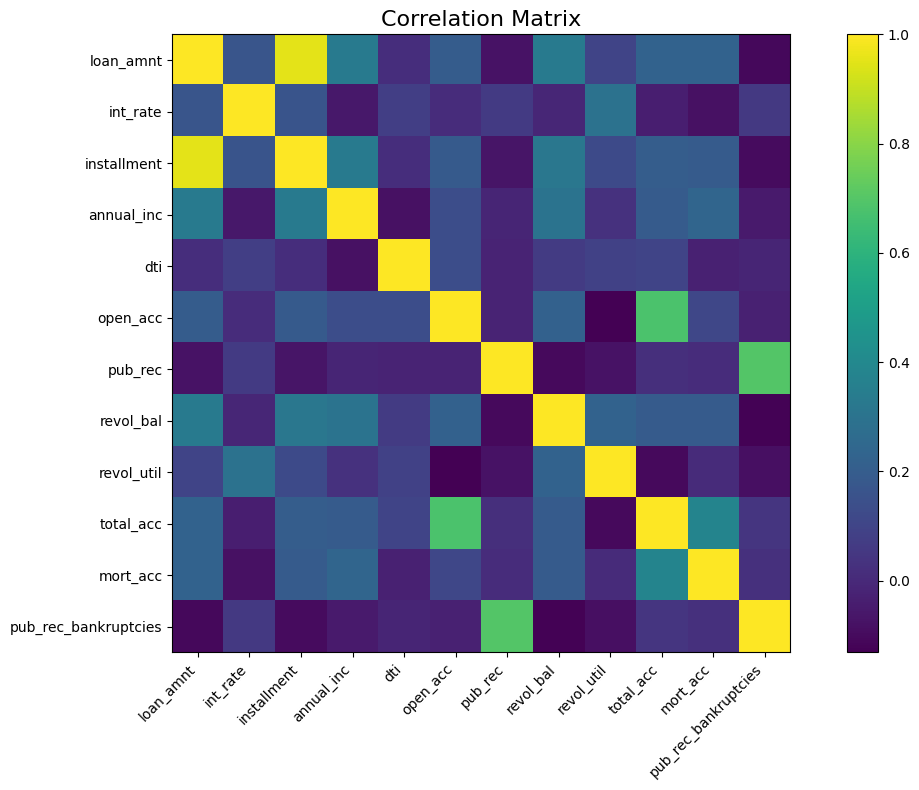

In [ ]:
plt.figure(figsize=(12, 8))
# corr_matrix = data.corr()

numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Visualize correlation (use code from the previous examples for heatmaps)

plt.figure(figsize=(12, 8))
plt.imshow(corr_matrix, interpolation='nearest', cmap='viridis')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=10)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/d2/y640fwsj1zxgxrl01yz0zk240000gn/T/ipykernel_14629/3198164131.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


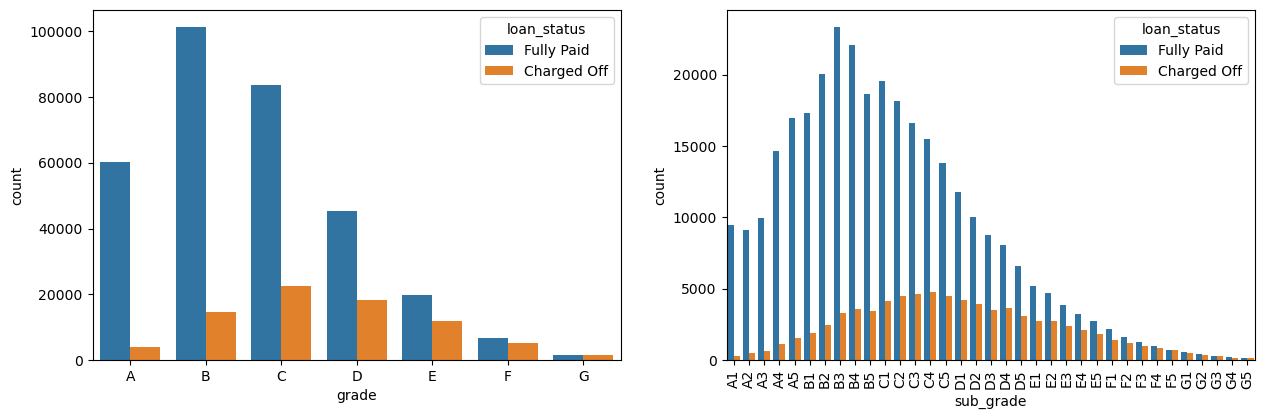

In [5]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);


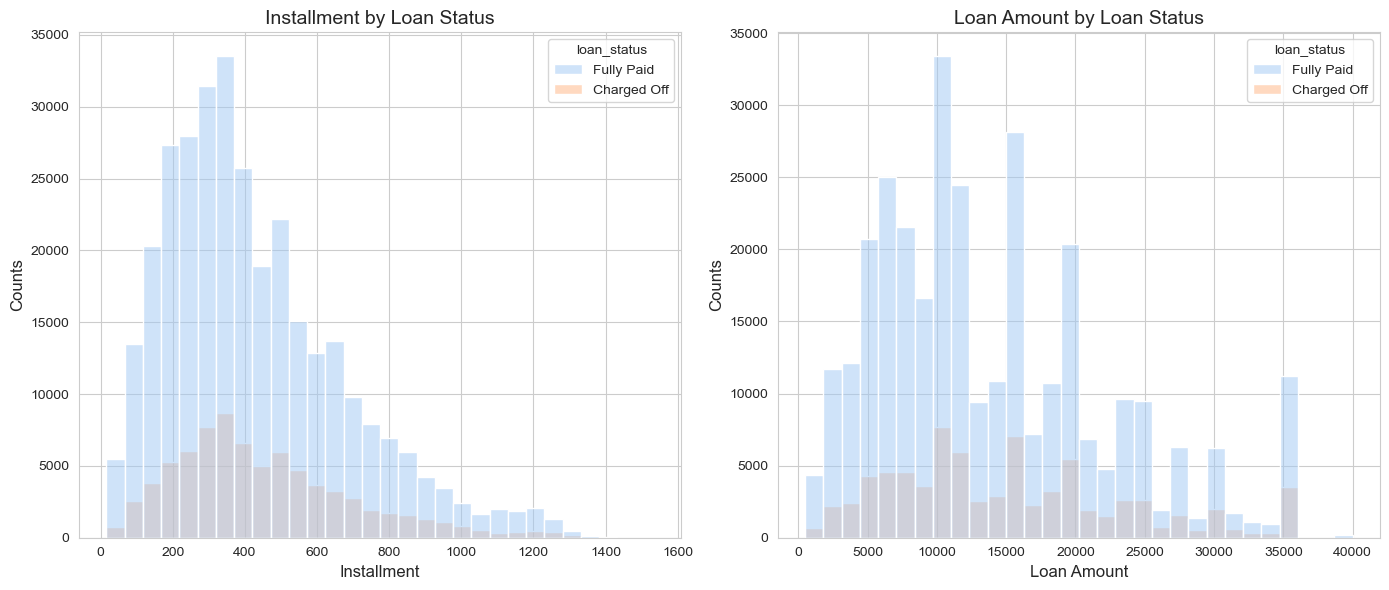

In [6]:
# Set the style for the plots
sns.set_style("whitegrid")

# Create the first plot: Installment by Loan Status
plt.figure(figsize=(14, 6))

# Subplot 1: Installment by Loan Status
plt.subplot(1, 2, 1)
sns.histplot(data=data, x="installment", hue="loan_status", kde=False, palette="pastel", bins=30)
plt.title("Installment by Loan Status", fontsize=14)
plt.xlabel("Installment", fontsize=12)
plt.ylabel("Counts", fontsize=12)

# Subplot 2: Loan Amount by Loan Status
plt.subplot(1, 2, 2)
sns.histplot(data=data, x="loan_amnt", hue="loan_status", kde=False, palette="pastel", bins=30)
plt.title("Loan Amount by Loan Status", fontsize=14)
plt.xlabel("Loan Amount", fontsize=12)
plt.ylabel("Counts", fontsize=12)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [7]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
SUB_GRADE unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


#  Data PreProcessing



In [3]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1756' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [4]:
data.drop('emp_title', axis=1, inplace=True)
data.drop('emp_length', axis=1, inplace=True)
data.drop('title', axis=1, inplace=True)

In [5]:
data['mort_acc'] = pd.to_numeric(data['mort_acc'], errors='coerce')
# Drop rows with NaN in 'mort_acc' if necessary
data = data.dropna(subset=['mort_acc'])
# Group by 'total_acc' and calculate the mean of 'mort_acc'
total_acc_avg = data.groupby('total_acc')['mort_acc'].mean()


In [6]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [7]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

## objective data to numeric data

In [8]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [9]:
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [10]:
data.drop('address', axis=1, inplace=True)
data.drop('issue_d', axis=1, inplace=True)
data.drop('earliest_cr_line', axis=1, inplace=True)


In [11]:
data.drop('grade', axis=1, inplace=True)

In [12]:
data.dropna(inplace=True)

In [60]:
data.dtypes

loan_amnt               float64
term                      int64
int_rate                float64
installment             float64
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
dti                     float64
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
zip_code                 object
dtype: object

In [13]:
data['sub_grade'] = data['sub_grade'].astype('category')
data['sub_grade_encoded'] = data['sub_grade'].cat.codes

# Drop the original categorical column if not needed
data = data.drop('sub_grade', axis=1)

In [14]:
data['verification_status'] = data['verification_status'].astype('category')
data['verification_status_encoded'] = data['verification_status'].cat.codes

# Drop the original categorical column if not needed
data = data.drop('verification_status', axis=1)

In [15]:
data['purpose'] = data['purpose'].astype('category')
data['purpose_encoded'] = data['purpose'].cat.codes

# Drop the original categorical column if not needed
data = data.drop('purpose', axis=1)

In [16]:
data['initial_list_status'] = data['initial_list_status'].astype('category')
data['initial_list_status_encoded'] = data['initial_list_status'].cat.codes

# Drop the original categorical column if not needed
data = data.drop('initial_list_status', axis=1)

In [17]:
data['application_type'] = data['application_type'].astype('category')
data['application_type_encoded'] = data['application_type'].cat.codes

# Drop the original categorical column if not needed
data = data.drop('application_type', axis=1)

In [18]:
data['home_ownership'] = data['home_ownership'].astype('category')
data['home_ownership_encoded'] = data['home_ownership'].cat.codes

# Drop the original categorical column if not needed
data = data.drop('home_ownership', axis=1)

In [19]:
data['zip_code'] = data['zip_code'].astype('category')
data['zip_code_encoded'] = data['zip_code'].cat.codes

# Drop the original categorical column if not needed
data = data.drop('zip_code', axis=1)

## 🔪 Train Test Split

In [20]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

print(train.shape)
print(test.shape)

(286411, 21)
(71603, 21)


# Removing Outliers

In [21]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(286411, 21)
(283404, 21)


## Train Split data


In [22]:
X = data.drop('loan_status', axis=1)
y = data.loan_status
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status


In [36]:

X_train.dtypes

loan_amnt                      float64
term                             int64
int_rate                       float64
installment                    float64
annual_inc                     float64
dti                            float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                     float64
total_acc                      float64
mort_acc                       float64
pub_rec_bankruptcies           float64
sub_grade_encoded                 int8
verification_status_encoded       int8
purpose_encoded                   int8
initial_list_status_encoded       int8
application_type_encoded          int8
home_ownership_encoded            int8
zip_code_encoded                  int8
dtype: object

In [25]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Chi-square Test

In [ ]:
chi2_selector = SelectKBest(score_func=chi2, k=2)  # Select top 2 features
X_new = chi2_selector.fit_transform(X, y)

# Get selected feature scores and p-values
scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Display scores and p-values
selected_features = pd.DataFrame({'Feature': X.columns, 'Chi2_Score': scores, 'P-Value': p_values})
# print(selected_features.sort_values(by='Chi2_Score', ascending=False))
# Filter features containing 'encoded' in their names
categorical_features = selected_features[selected_features['Feature'].str.contains('encoded')]

# Sort by Chi2 Score (optional, for better visualization)
categorical_features = categorical_features.sort_values(by='Chi2_Score', ascending=False)

# Display filtered categorical features
print(categorical_features)


                        Feature  Chi2_Score  P-Value
13            sub_grade_encoded    98126.36     0.00
19             zip_code_encoded    56252.97     0.00
18       home_ownership_encoded     2527.71     0.00
14  verification_status_encoded     1399.58     0.00
15              purpose_encoded      438.55     0.00
16  initial_list_status_encoded        0.31     0.58
17     application_type_encoded        0.10     0.75


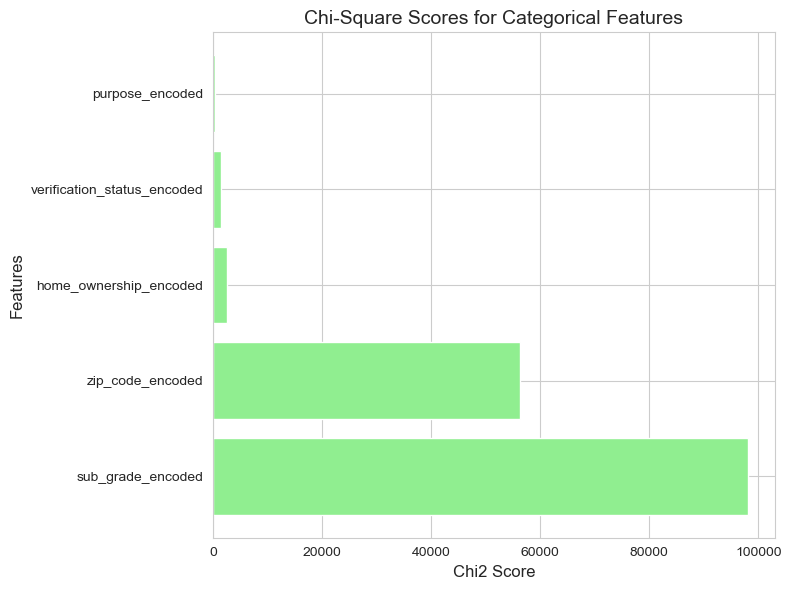

In [40]:
# Create a horizontal bar chart
# Filter significant features (p-value < 0.05)
significant_features = categorical_features[categorical_features['P-Value'] < 0.05]
plt.figure(figsize=(8, 6))
plt.barh(significant_features['Feature'], significant_features['Chi2_Score'], color='lightgreen')
plt.title('Chi-Square Scores for Categorical Features', fontsize=14)
plt.xlabel('Chi2 Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


## PCA


In [42]:
# Perform PCA
pca = PCA()  # Compute all components
pca.fit(X)  # X is your standardized data

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Calculate cumulative variance
cumulative_variance = explained_variance.cumsum()

# Find the number of PCs needed to explain 95% variance
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1

# Print results
print(f"Number of PCs to explain 95% variance: {n_components_95}")
print(f"Cumulative Variance by Components:\n{cumulative_variance}")

Number of PCs to explain 95% variance: 2
Cumulative Variance by Components:
[0.89288509 0.98657225 0.99999842 0.99999973 0.99999986 0.99999994
 0.99999997 0.99999999 0.99999999 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


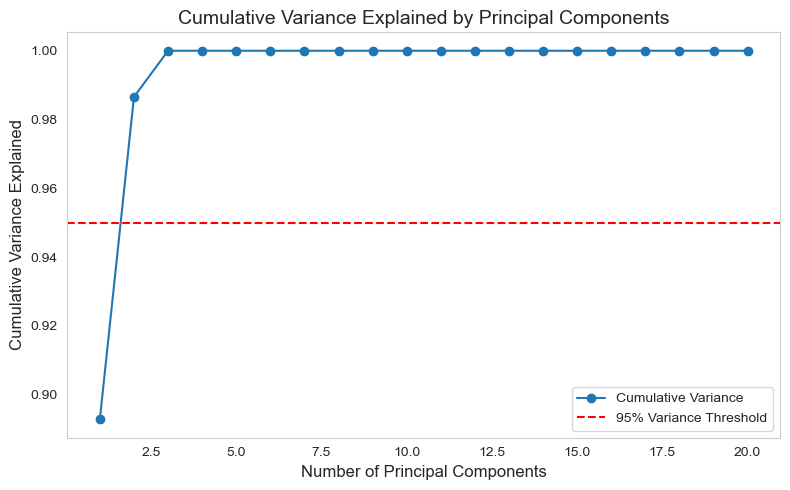

In [43]:
# Create a scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', label='Cumulative Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')

# Add labels and title
plt.title('Cumulative Variance Explained by Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Variance Explained', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

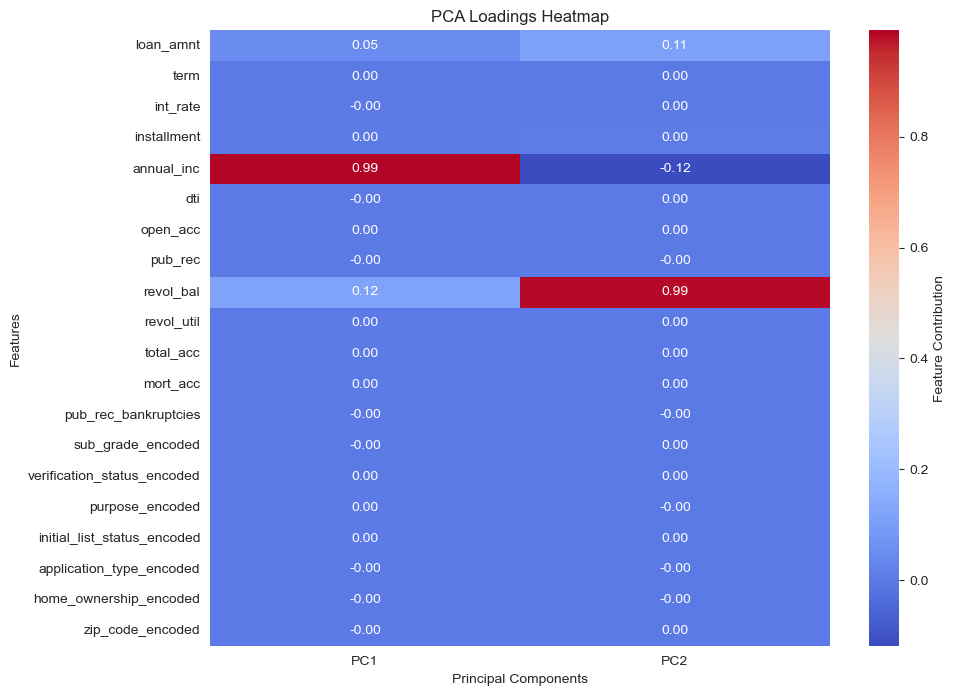

In [44]:
pca = PCA(n_components=2) 
pca.fit(X)

# Create a DataFrame for the loading matrix
loadings = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(loadings.T, cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={'label': 'Feature Contribution'})
plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()

## L1


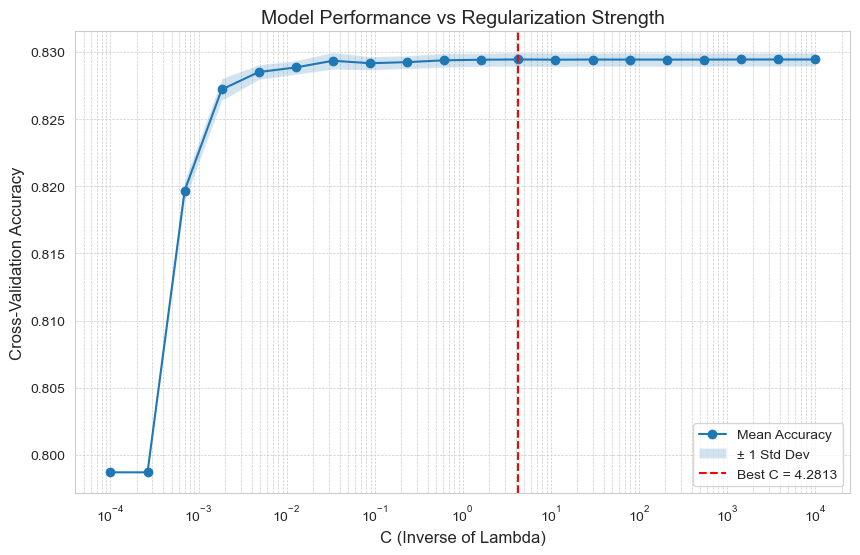

In [45]:


# Define the range of C values
c_values = np.logspace(-4, 4, 20)

# Store cross-validation scores
mean_scores = []
std_scores = []

# Perform cross-validation for each C value
for c in c_values:
    logreg = LogisticRegression(penalty='l1', solver='saga', C=c, max_iter=100)
    scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Find the best C value
best_index = np.argmax(mean_scores)
best_c = c_values[best_index]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(c_values, mean_scores, marker='o', label='Mean Accuracy')
plt.fill_between(
    c_values, 
    np.array(mean_scores) - np.array(std_scores), 
    np.array(mean_scores) + np.array(std_scores), 
    alpha=0.2, label='± 1 Std Dev'
)
plt.xscale('log')
plt.xlabel('C (Inverse of Lambda)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.title('Model Performance vs Regularization Strength', fontsize=14)
plt.axvline(best_c, color='red', linestyle='--', label=f'Best C = {best_c:.4f}')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [77]:
logreg = LogisticRegression(penalty='l1', solver='saga', C=0.0048, max_iter=100)  # L1 regularization
logreg.fit(X_train, y_train)

LogisticRegression(C=0.0048, penalty='l1', solver='saga')

In [78]:
# Extract the coefficients and feature names
coefficients = pd.DataFrame({
    'Feature': X.columns,  # Replace with the column names from your training data
    'Coefficient': logreg.coef_.flatten()
})

# Sort by absolute coefficient values
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Display the coefficients
print(coefficients)


                        Feature  Coefficient  Abs_Coefficient
19             zip_code_encoded        -3.24             3.24
13            sub_grade_encoded        -2.50             2.50
5                           dti        -1.08             1.08
4                    annual_inc         0.80             0.80
1                          term        -0.40             0.40
18       home_ownership_encoded        -0.37             0.37
9                    revol_util        -0.18             0.18
14  verification_status_encoded        -0.08             0.08
0                     loan_amnt        -0.05             0.05
10                    total_acc         0.00             0.00
8                     revol_bal         0.00             0.00
7                       pub_rec         0.00             0.00
11                     mort_acc         0.00             0.00
12         pub_rec_bankruptcies         0.00             0.00
6                      open_acc         0.00             0.00
3       

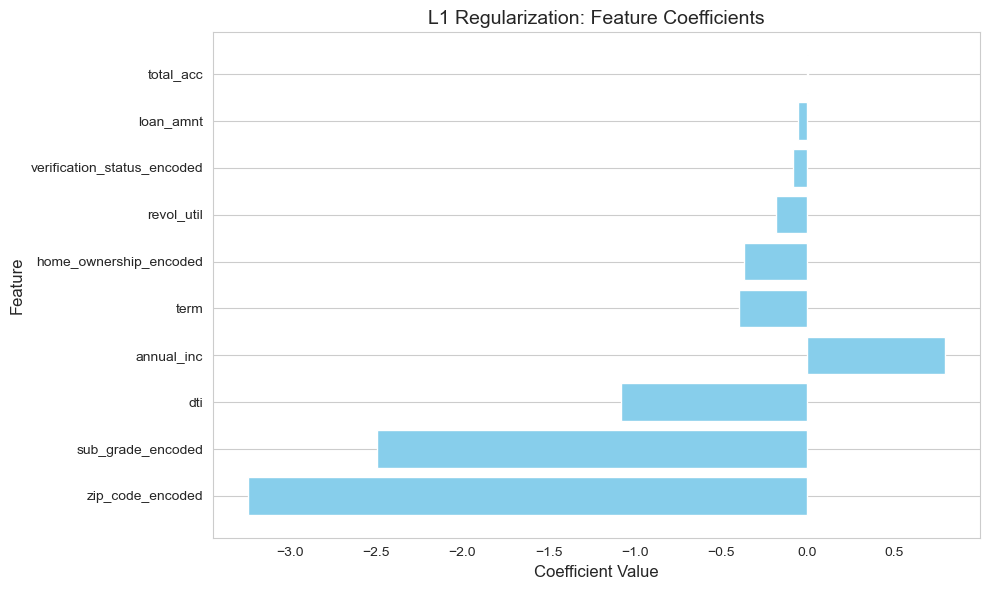

In [79]:
non_zero_coefficients = coefficients[coefficients['Coefficient'] != 0]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(non_zero_coefficients['Feature'], non_zero_coefficients['Coefficient'], color='skyblue')
plt.title('L1 Regularization: Feature Coefficients', fontsize=14)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x')
plt.tight_layout()

# Show the plot
plt.show()


In [26]:
## now we only use usful data, and do resample since its imbalanced.
# X = data.drop(['loan_status','initial_list_status_encoded','application_type_encoded','total_acc','pub_rec','mort_acc','pub_rec_bankruptcies','open_acc','installment','int_rate','initial_list_status_encoded','application_type_encoded'], axis=1)
# y = data.loan_status
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
X_train, y_train = train.drop(['loan_status','initial_list_status_encoded','application_type_encoded','total_acc','pub_rec','mort_acc','pub_rec_bankruptcies','open_acc','installment','int_rate','initial_list_status_encoded','application_type_encoded'], axis=1), train.loan_status
X_test, y_test = test.drop(['loan_status','initial_list_status_encoded','application_type_encoded','total_acc','pub_rec','mort_acc','pub_rec_bankruptcies','open_acc','installment','int_rate','initial_list_status_encoded','application_type_encoded'], axis=1), test.loan_status


In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## KNN


In [85]:

k_values = range(2, 8)  # Test K from 1 to 20
scores = []

# Encode the categorical labels into integers
label_encoder = LabelEncoder()
y_resampled_encoded = label_encoder.fit_transform(y_resampled)
y_test_encoded = label_encoder.transform(y_test)

# Map labels
print("Label Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Label Mapping: {'Charged Off': 0, 'Fully Paid': 1}


In [86]:

# Define custom scorer for F1 score
f1_scorer = make_scorer(f1_score, pos_label=1)  # Positive label is now 1 after encoding

# Use this custom scorer in cross-validation
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_resampled, y_resampled_encoded, cv=5, scoring=f1_scorer)
    scores.append(cv_scores.mean())

# Find the best K
best_k = k_values[np.argmax(scores)]
print(f"Best K: {best_k}")
print(f"Best Cross-Validation F1 Score: {max(scores):.4f}")


Best K: 3
Best Cross-Validation F1 Score: 0.8697


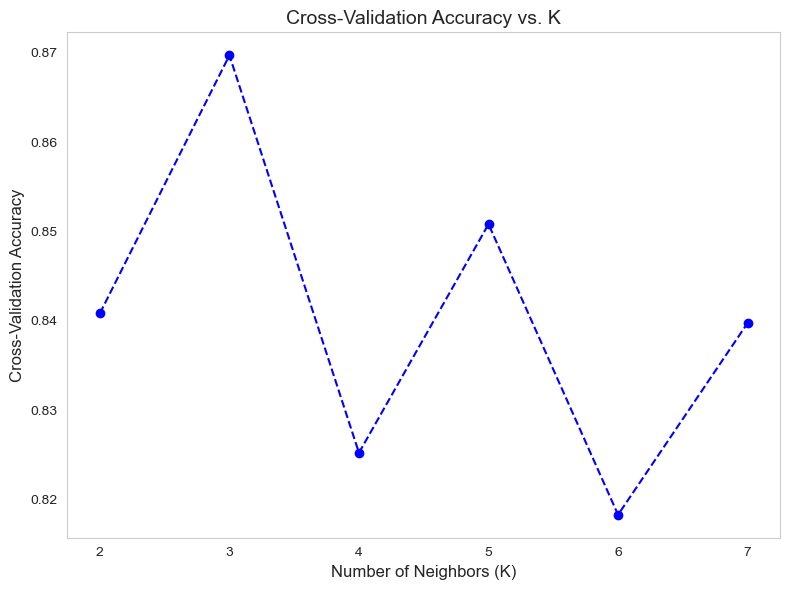

Test Accuracy: 0.7705


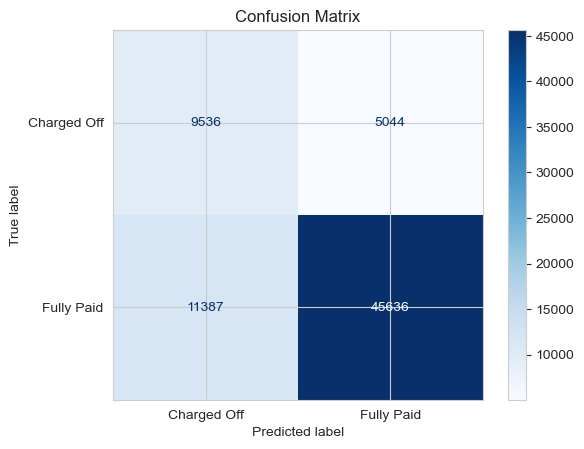

In [87]:

# Plot accuracy vs. K
plt.figure(figsize=(8, 6))
plt.plot(k_values, scores, marker='o', linestyle='--', color='b')
plt.title('Cross-Validation Accuracy vs. K', fontsize=14)
plt.xlabel('Number of Neighbors (K)', fontsize=12)
plt.ylabel('Cross-Validation Accuracy', fontsize=12)
plt.xticks(k_values)
plt.grid()
plt.tight_layout()
plt.show()

# Train the KNN model using the best K
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_resampled, y_resampled)

# Evaluate the model on the test set
y_pred = best_knn.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_knn.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [88]:

# knn = KNeighborsClassifier(n_neighbors=3)  # Set k=3
# Train the model
# knn.fit(X_train, y_train)
# y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7705263745932432
Classification Report:
              precision    recall  f1-score   support

 Charged Off       0.46      0.65      0.54     14580
  Fully Paid       0.90      0.80      0.85     57023

    accuracy                           0.77     71603
   macro avg       0.68      0.73      0.69     71603
weighted avg       0.81      0.77      0.78     71603



## K-means

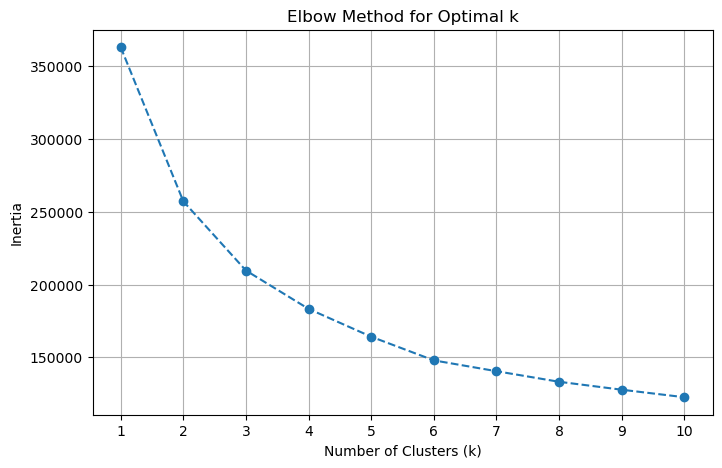

In [29]:


# Elbow Method to find the best k
def optimal_k_using_elbow(X, max_k=10):
    """
    Determine the optimal number of clusters (k) using the Elbow Method.

    Parameters:
        X: np.ndarray or pd.DataFrame
            The input data for clustering.
        max_k: int
            The maximum number of clusters to test.

    Returns:
        None
    """
    inertia = []  # List to store inertia values
    k_values = range(1, max_k + 1)  # Test k from 1 to max_k

    # Fit KMeans for each k and calculate inertia
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertia, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_values)
    plt.grid()
    plt.show()

# Example usage
# Replace X_train with your dataset
optimal_k_using_elbow(X_resampled, max_k=10)


In [36]:
# Assuming you have already trained KMeans with n_clusters=6
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train)

# Predict clusters
y_pred = kmeans.predict(X_train)
# Map ground truth labels to integers
def encode_labels(y_true, y_pred):
    """
    Ensures that y_true and y_pred are numeric and compatible for comparison.

    Parameters:
        y_true: array-like (e.g., pandas Series or NumPy array)
            Ground truth labels (can be strings or objects).
        y_pred: array-like
            Predicted cluster labels (numeric).

    Returns:
        y_true_encoded, y_pred_mapped: Both converted to numeric and aligned.
    """
    # Convert y_true to a NumPy array if not already
    y_true = np.array(y_true)
    
    # Create a mapping for y_true labels
    unique_labels = np.unique(y_true)
    label_to_int = {label: idx for idx, label in enumerate(unique_labels)}
    y_true_encoded = np.array([label_to_int[label] for label in y_true])
    
    # Map cluster labels to true labels
    mapping = {}
    for cluster in np.unique(y_pred):
        indices = np.where(y_pred == cluster)  # Indices of samples in this cluster
        true_labels = y_true_encoded[indices]  # Actual numeric labels for these samples
        most_common_label = np.bincount(true_labels).argmax()  # Majority label
        mapping[cluster] = most_common_label

    # Map y_pred clusters to true labels
    y_pred_mapped = np.array([mapping[cluster] for cluster in y_pred])
    
    return y_true_encoded, y_pred_mapped

# Convert labels to numeric and align
y_true_encoded, y_pred_mapped = encode_labels(y_train, y_pred)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_true_encoded, y_pred_mapped)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_true_encoded, y_pred_mapped))


Confusion Matrix:
[[     0  57050]
 [     0 226354]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     57050
           1       0.80      1.00      0.89    226354

    accuracy                           0.80    283404
   macro avg       0.40      0.50      0.44    283404
weighted avg       0.64      0.80      0.71    283404



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## logistic regression

In [102]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_resampled, y_resampled)


LogisticRegression()

In [103]:
# Predict on the test data
y_pred = logreg.predict(X_test)

# Predict probabilities (optional)
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1


In [104]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.71


In [92]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

 Charged Off       0.60      0.24      0.34     14580
  Fully Paid       0.83      0.96      0.89     57023

    accuracy                           0.81     71603
   macro avg       0.72      0.60      0.62     71603
weighted avg       0.79      0.81      0.78     71603



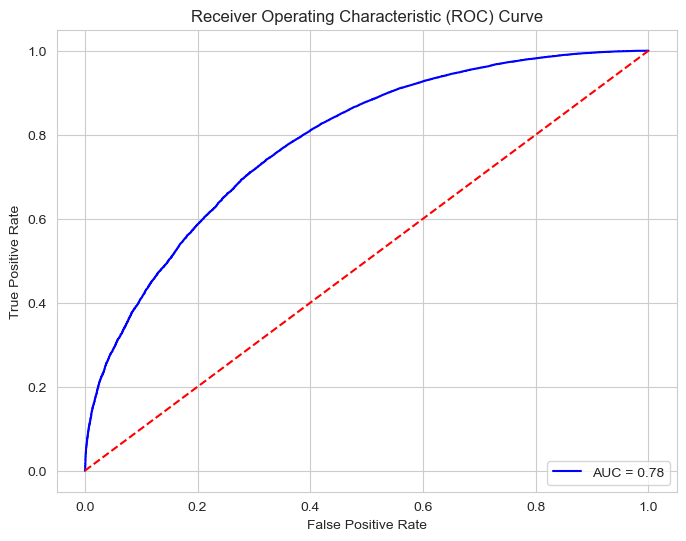

In [107]:
# Convert target labels to numeric
y_test_numeric = y_test.map({'Fully Paid': 1, 'Charged Off': 0})



fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob, pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## RMF



In [108]:


# Train a Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8704244235576721
Classification Report:
              precision    recall  f1-score   support

 Charged Off       0.73      0.58      0.64     14580
  Fully Paid       0.90      0.95      0.92     57023

    accuracy                           0.87     71603
   macro avg       0.81      0.76      0.78     71603
weighted avg       0.86      0.87      0.86     71603



In [ ]:

feature_importance = rf.feature_importances_

# Create the DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': data.drop(['loan_status','initial_list_status_encoded','application_type_encoded','total_acc','pub_rec','mort_acc','pub_rec_bankruptcies','open_acc','installment','int_rate','initial_list_status_encoded','application_type_encoded'], axis=1).columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Print and visualize
print(feature_importance_df)


                        Feature  Importance
10             zip_code_encoded        0.40
6             sub_grade_encoded        0.16
8               purpose_encoded        0.07
3                           dti        0.07
2                    annual_inc        0.07
5                    revol_util        0.06
0                     loan_amnt        0.06
4                     revol_bal        0.06
1                          term        0.02
7   verification_status_encoded        0.01
9        home_ownership_encoded        0.01


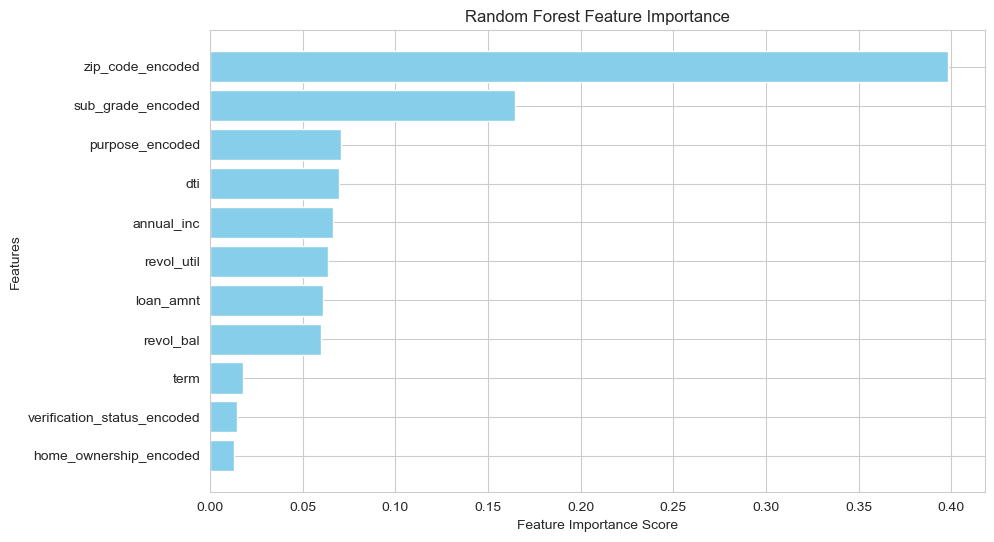

In [118]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()
